# Regression Techniques

 The objective  is to  understanding of regression techniques in supervised learning by applying them to a real-world dataset.

In [221]:
# Loading the  Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


# Loading the dataset

In [123]:
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [124]:
# 	Convert the dataset into a pandas DataFrame for easier handling
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


# Preprocessing

In [125]:
# Dataframe contains only feature names. need to include target column ie, MedHouseVal
df['MedHouseVal'] = california.target


In [126]:
# To get the basic info about the dataset
df.info()
# To get first few values
df.head(15)
# values of first 15 values target column
df.MedHouseVal.head(15)
# no.of unique values in target column
df.MedHouseVal.nunique()
# exploring column
df.MedHouseVal.unique()
df.HouseAge.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


52

In [127]:
# Checking for Missing values
df.isnull()
# no.of missing value
df.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [128]:
#checking for duplicated value
df.duplicated().sum()

0

In [129]:
# statistical analysing of each column
df.describe()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


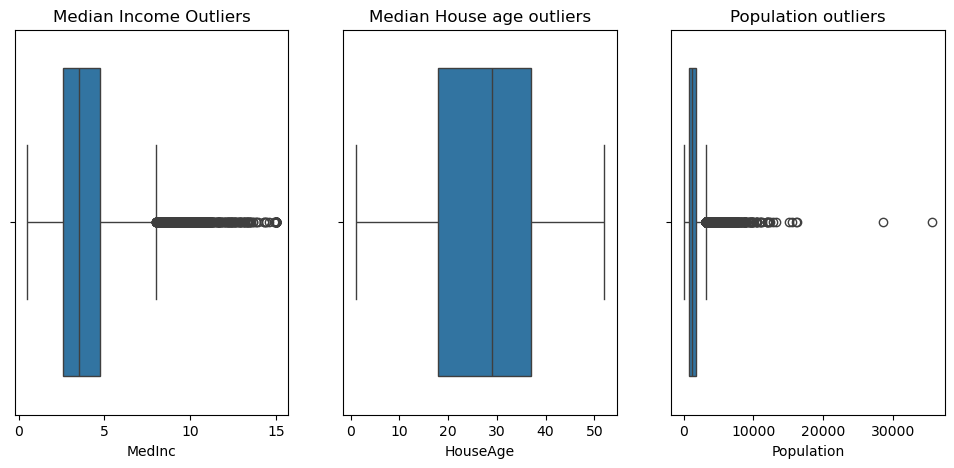

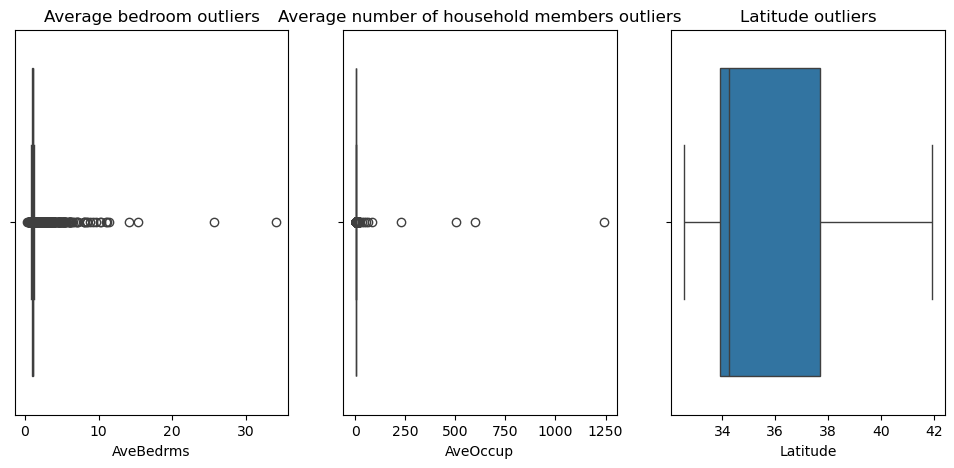

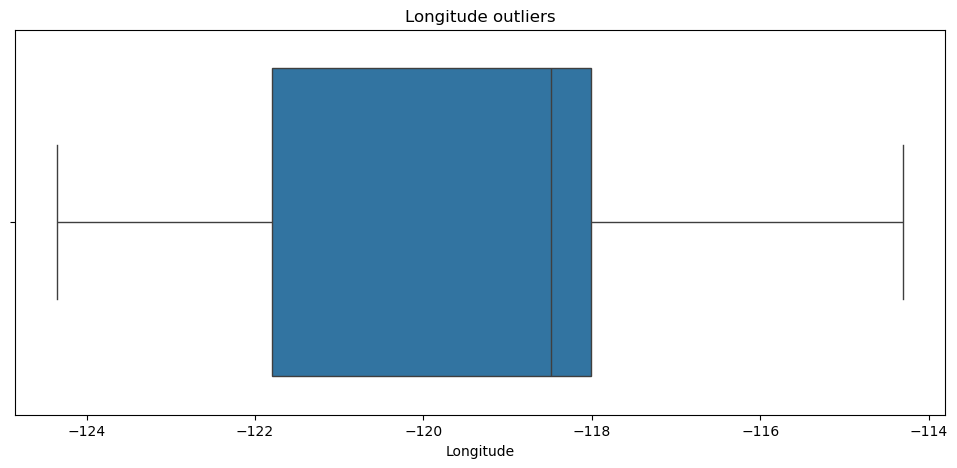

In [130]:
# Checking for the outliers using boxlot
fig, axes = plt.subplots(1,3,figsize = (12,5))
sns.boxplot(x = df['MedInc'], ax = axes[0]).set_title('Median Income Outliers')
sns.boxplot(x = df['HouseAge'], ax = axes[1]).set_title('Median House age outliers')
sns.boxplot(x = df['Population'], ax = axes[2]).set_title('Population outliers')
plt.show()

fig, axes = plt.subplots(1,3,figsize = (12,5))
sns.boxplot(x = df['AveBedrms'], ax = axes[0]).set_title('Average bedroom outliers')
sns.boxplot(x = df['AveOccup'], ax = axes[1]).set_title('Average number of household members outliers')
sns.boxplot(x = df['Latitude'], ax = axes[2]).set_title('Latitude outliers')
plt.show()

fig, axes = plt.subplots(figsize = (12,5))
sns.boxplot(x = df['Longitude']).set_title('Longitude outliers')
plt.show()





From boxplot Longitude,latitude and median house age column contains no outliers.All other columns need to perform outlier handling techniques

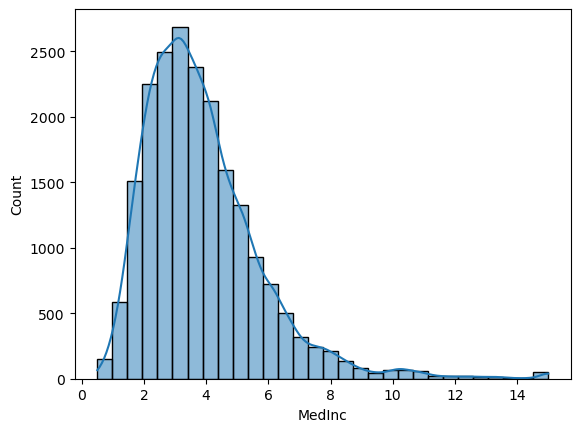

In [131]:
#Ploting histogram to check skewness of 'MedInc' column
sns.histplot(df['MedInc'], bins=30, kde = True)
plt.show()

'MedInc' column is right skewed, so using IQR method for finding outliers

In [132]:
# IQR methof for outlier detection - 'MedInc'column
Q1 = df['MedInc'].quantile(.25)
Q3 = df['MedInc'].quantile(.75)
IQR = Q3-Q1
lower = Q1 - 1.5* IQR
upper =  Q3 + 1.5 * IQR               
outlier = df.loc[(df['MedInc'] <= lower)  | (df['MedInc'] >= upper) ]
outlier


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.52600
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.58500
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,3.92600
134,8.2049,28.0,6.978947,0.968421,463.0,2.436842,37.83,-122.19,3.35200
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20,3.51200
...,...,...,...,...,...,...,...,...,...
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20428,8.7288,6.0,8.715842,1.102970,3385.0,3.351485,34.23,-118.83,4.25800
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [133]:
df['MedInc'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

In [134]:
# capping the outliers of MedInc column to upper bound
df.loc[df['MedInc'] > upper,'MedInc'] = upper
df.loc[df['MedInc'] < lower, 'MedInc'] = lower

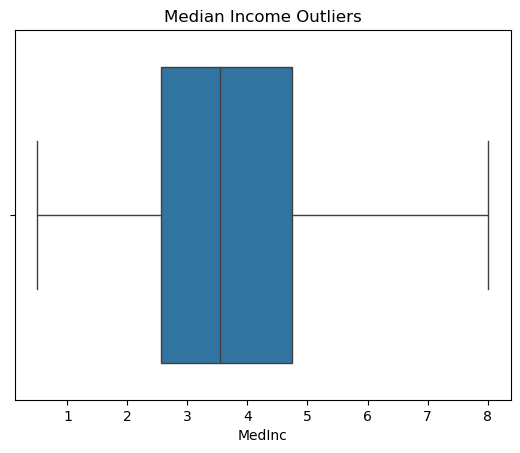

In [135]:
# Ploting box plot for visually Represents outliers
sns.boxplot(x = df['MedInc']).set_title('Median Income Outliers')
plt.show()

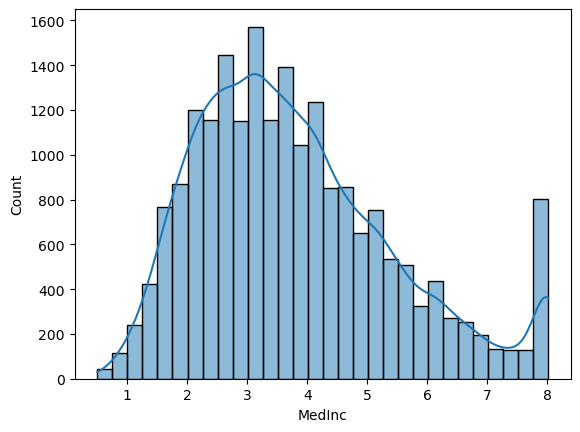

In [136]:
#Ploting histogram to check skewness after outlier removal
sns.histplot(df['MedInc'], bins=30, kde = True)
plt.show()

In [137]:
df['MedInc'].skew()

0.7356179725191178

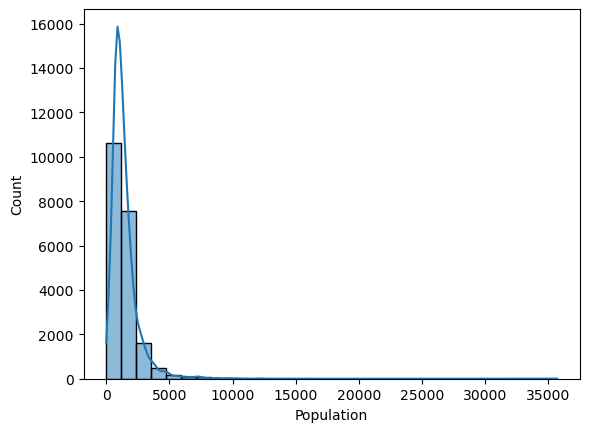

In [138]:
#Ploting histogram to check skewness 'HouseAge'
sns.histplot(df['Population'], bins=30, kde = True)
plt.show()

In [139]:
df['Population'].skew()

4.93585822672712

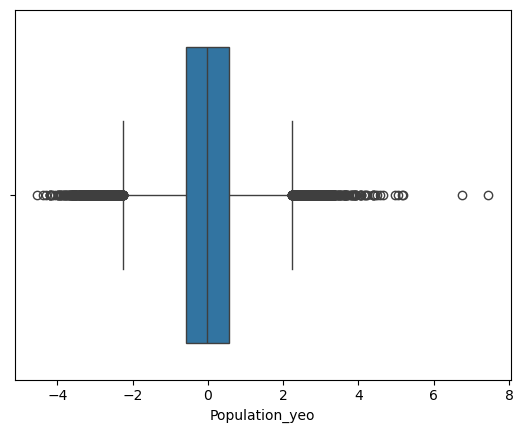

In [140]:
# Right skewed data has extreme values so using yeo johnson transformation
pt = PowerTransformer(method = 'yeo-johnson')
df[['Population_yeo']] = pt.fit_transform(df[['Population']])
sns.boxplot(x = df['Population_yeo'])
plt.show()

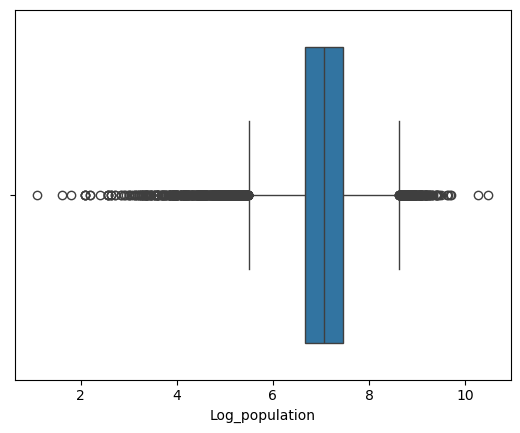

In [141]:
df['Log_population']=np.log(df['Population'])
sns.boxplot(x = df['Log_population'])
plt.show()

In [142]:
df['Log_population'].skew()

-1.070786100914493

In [143]:
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Population_yeo,Log_population
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,-1.619967,5.774552
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.090355,7.783641
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,-1.139853,6.206576
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,-1.000270,6.324359
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,-0.985268,6.336826
...,...,...,...,...,...,...,...,...,...,...,...
20635,1.560300,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,-0.476559,6.739337
20636,2.556800,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,-1.512730,5.874931
20637,1.700000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,-0.239419,6.914731
20638,1.867200,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,-0.647855,6.608001


Training Testing Split

In [157]:
X = df.drop('MedHouseVal', axis = 1)
Y = df['MedHouseVal']

In [158]:
# spliting to train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

Now perform feature scaling (standardization) on this dataset.



In [166]:
# Performing scalling on input feature
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# Performing scalling on input feature
scaler_y = StandardScaler()

# Ensure Y is reshaped to 2D
Y_train = Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

Y_train_scaled = scaler_y.fit_transform(Y_train)
Y_test_scaled = scaler_y.transform(Y_test)

# 	Regression Algorithm Implementation

# 1.	Linear Regression

Linear Regression is a supervised machine learning algorithm used for predicting continuous numerical values.
When there is a linear relationship between inputs and output.It finds the best-fitting straight line (or hyperplane) through data to estimate the relationship between the input features (X) and the output (target) variable (y).
Start with data (e.g., house area, number of rooms, etc.)
The model tries different lines (or equations) through the data.
It calculates how far its predictions are from the actual values using a loss function (typically Mean Squared Error).
It adjusts the coefficients (b₁, b₂, …) to minimize the error.
Once the error is minimized, the model has found the best line.

Why Use Linear Regression for the house_price.csv Dataset?
* Linear Regression gives you a straightforward equation showing how each feature (like area, number of bedrooms, location) affects house price.
  Useful for understanding which factors are most influential in determining price.
* Linear models are computationally light, even on large datasets.Quick to train and deploy — ideal for initial baseline modeling.
* If features (e.g., area or number of bathrooms) are linearly correlated with the target (Price), linear regression can perform reasonably well.
* Even if it's not the best model overall, Linear Regression is a great benchmark to compare against more complex models
* If categorical variables are encoded and numerical features are scaled, Linear Regression can perform decently — especially on well-behaved (low-        noise) data.

In [167]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train_scaled,Y_train_scaled)

LinearRegression()

In [174]:
# predict
Y_predict_scaled = model.predict(X_test_scaled)


In [179]:
#  Evaluate model
Y_predict = scaler_y.inverse_transform(Y_predict_scaled)       # Convert back to original price scale
Y_test_original = scaler_y.inverse_transform(Y_test_scaled)

In [185]:
# Linear Regression Evaluation Metrics
print("R2 score: ",r2_score(Y_test_original,Y_predict))
print("Mean Absolute Error:",mean_absolute_error(Y_test_original,Y_predict))
print("Mean Squared Error:",mean_squared_error(Y_test_original,Y_predict))

R2 score:  0.5695517712053986
Mean Absolute Error: 0.5409461276303219
Mean Squared Error: 0.5640632236803387


# 	Decision Tree Regressor

A Decision Tree Regressor is a machine learning algorithm used for predicting continuous values (regression tasks). It works by splitting the dataset into smaller subsets based on the feature values, and making predictions using the average of target values in each final group (called a "leaf").  

Start at the root node (the full dataset).    

Choose the best feature and value to split the data — the split that minimizes prediction error (e.g., using mean squared error).

Split the data into two branches.    

Repeat the process for each branch until:       

A maximum depth is reached                   

A minimum number of samples per leaf is met                   

The data in the node becomes pure (low variance)           

In each leaf node, the prediction is the average value of the target in that group. 

Why Decission for this dataset ?
 *  House price is rarely a linear function of area or rooms.A decision tree can split the data into meaningful range and adapt to complex patterns.
 *  Unlike linear regression or SVR, decision trees don’t require StandardScaler or MinMaxScaler. can feed raw numeric or label-encoded data directly.
 *  Tree-based models aren’t affected much by extreme values in target or features.Useful if some houses in your dataset are unusually expensive or          cheap.
 *  Can visualize the decision tree to see why the model predicted a certain price.This is helpful for business stakeholders or real estate analysis.


In [189]:
# Training
model2 = DecisionTreeRegressor()
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [215]:
# Testing model
Y_pred = model2.predict(X_test)

In [216]:
# Decision tree Regression Evaluation Metrics
print("R2 score: ",r2_score(Y_test,Y_pred))
print("Mean Absolute Error:",mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))

R2 score:  0.6223949680335108
Mean Absolute Error: 0.4572855717054264
Mean Squared Error: 0.4948170241178294


# 	Random Forest Regressor

In [204]:
# Training 
model3 = RandomForestRegressor()
model3.fit(X_train_scaled,Y_train)

C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [217]:
# Predict and evaluate
Y_Result = model3.predict(X_test_scaled)

In [219]:

print(" Random Forest Regressor Performance:")
print("R Score:", r2_score(Y_test, Y_Result))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_Result))
print("Mean Squared Error :", mean_squared_error(Y_test, Y_Result))

 Random Forest Regressor Performance:
R Score: 0.807380250927651
Mean Absolute Error: 0.32789446116763576
Mean Squared Error : 0.25241064857091533


# Gradient Boosting Regressor

Gradient Boosting builds an ensemble of decision trees, where each tree corrects the errors of the previous one. It is powerful for complex, non-linear datasets and usually achieves better accuracy than Random Forest, especially with fine-tuned parameters.

In [211]:
#  Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, Y_train)

C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=42)

In [212]:
 # Make predictions
y_pred = gbr.predict(X_test)

In [220]:
# Evaluate the model
print(" Gradient Boosting Regressor Performance:")
print("R2 Score:", r2_score(Y_test, y_pred))
print("MAE:", mean_absolute_error(Y_test, y_pred))
print("MSE:", mean_squared_error(Y_test, y_pred))

 Gradient Boosting Regressor Performance:
R2 Score: 0.7744810479660948
MAE: 0.37193939393477904
MSE: 0.2955220595087082


Why Use Gradient Boosting for This Dataset?

* Handles non-linear patterns,	House prices vary by many factors like size, location, etc.
* Works well with tabular data
* Often more accurate than Random Forest
* Robust to outliers

# Support Vector Regression (SVR)

Support Vector Regression (SVR) is a machine learning algorithm that tries to fit the best line within a margin (epsilon) where predictions are considered “good enough.”
It's especially good for:
* Small to medium-sized datasets
* Non-linear regression
* Where precise control over errors is needed

In [222]:
#  Train the SVR model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, Y_train_scaled)

C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [224]:
# Predict
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # back to original scale
y_test_original = scaler_y.inverse_transform(Y_test_scaled.reshape(-1, 1))


In [226]:
 # Evaluate
print(" SVR Model Performance:")
print("R2 Score:", r2_score(y_test_original, y_pred))
print("MAE:", mean_absolute_error(y_test_original, y_pred))
print("MSE:", mean_squared_error(y_test_original, y_pred))

 SVR Model Performance:
R2 Score: 0.7406785947004699
MAE: 0.38145820293235144
MSE: 0.33981709775455143


# Model Evaluation and Comparison 

* Best Performance algorithm: RandomForestRegressor

R2 score, MAE,MSE scores are better than those of Gradient Boosting, Linear Regression, and SVR.
A higher R² means the model explains more variance in house prices.
Lower MAE and MSE indicate more accurate predictions with fewer large errors.
House prices depend on multiple non-linear factors.
Random Forest captures these relationships using many decision trees and combines them to give a stable prediction.

* The worst-performing algorithm: LinearRegression

Assumes a linear relationship between features and the target, which is too simplistic for real-world housing data.
Cannot handle interactions or non-linearity between features.
Sensitive to outliers — house prices often have extreme values that skew results.
Typically has lower R² score 0.56, meaning it explains less of the variance in the target variable.